In [16]:
import numpy as np
import concurrent.futures
import time
import pandas as pd
import matplotlib.pyplot as plt

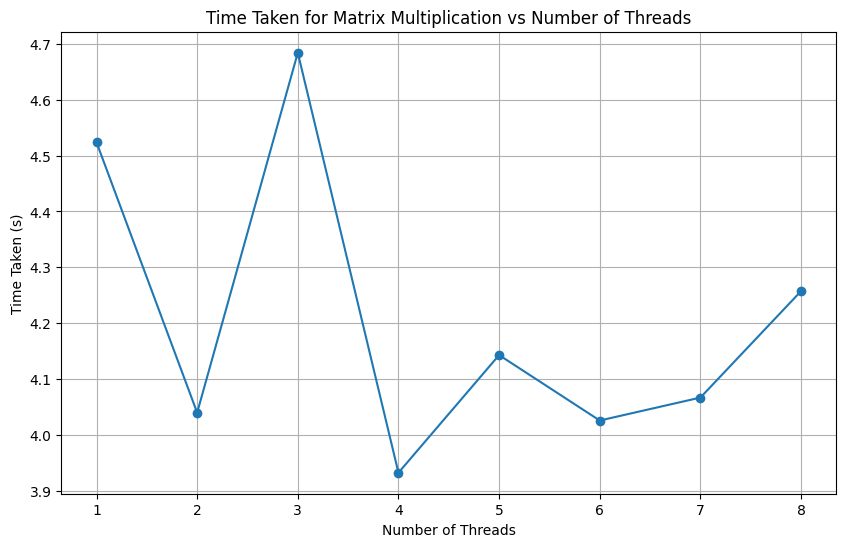

Table: Time Taken for Matrix Multiplication
 Number of Threads  Time Taken (s)
                 1        4.523652
                 2        4.040246
                 3        4.683769
                 4        3.932887
                 5        4.143244
                 6        4.026205
                 7        4.067228
                 8        4.257533


In [17]:
def generate_random_matrix():
    return np.random.rand(1000, 1000)
    
constant_matrix = generate_random_matrix()

def multiply(matrix):
    return np.dot(matrix, constant_matrix)

def multiply_with_threads(matrices, num_threads):
    start_time = time.time()
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = [executor.submit(multiply, matrix) for matrix in matrices]
        results = [future.result() for future in concurrent.futures.as_completed(futures)]
    end_time = time.time()
    cpu_usage = end_time - start_time
    return cpu_usage

random_matrices = [generate_random_matrix() for _ in range(100)]

time_taken = []
for num_threads in range(1, 9):
    total_time = multiply_with_threads(random_matrices, num_threads)
    time_taken.append(total_time)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), time_taken, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken for Matrix Multiplication vs Number of Threads')
plt.grid(True)
plt.show()

thread_times = {'Number of Threads': range(1, 9), 'Time Taken (s)': time_taken}
df = pd.DataFrame(thread_times)
print("Table: Time Taken for Matrix Multiplication")
print(df.to_string(index=False))
